In [1]:
pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 45.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Activation,Dense, Dropout, Flatten

from keras.models import Model

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [23]:
imageSize=128
train_dir = "/content/drive/MyDrive/deep learing/Train"
test_dir =  "/content/drive/MyDrive/deep learing/Test"
# ['Covid19', 'Normal', 'Opacity', 'Pneumonia']
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):

            if folderName in ['CNV']:
                label = 0
            elif folderName in ['DME']:
                label = 1
            elif folderName in ['DRUSEN']:
                label = 2
            elif folderName in ['NORMAL']:
                label = 3
            else:
                label = 4

            for image_filename in tqdm(os.listdir(folder + '/'+folderName)):


                img_file = cv2.imread(folder + '/'+folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)

                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)

    return X,y
X_train, y_train = get_data(train_dir) # Un-comment to use full dataset: Step 1 of 2
X_test, y_test= get_data(test_dir)


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


In [24]:
''' Inception Model '''
model1 = tf.keras.applications.inception_v3.InceptionV3(input_shape=(128,128,3),include_top=False,weights='imagenet',pooling='avg')

''' freezing layers '''
model1.trainable = False

In [26]:
folders = glob('/content/drive/MyDrive/deep learing/Train/*')
# our layers - you can add more if you want
x = Flatten()(model1.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=model1.input, outputs=prediction)

In [27]:

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [28]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/deep learing/Train',
                                                 target_size = (128, 128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/deep learing/Test',
                                            target_size = (128, 128),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 200 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [29]:
history = model.fit(training_set,validation_data=test_set, epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
13/13 [==============================] - 9s 351ms/step - loss: 2.0703 - accuracy: 0.3100 - val_loss: 1.0360 - val_accuracy: 0.5250
Epoch 2/25
13/13 [==============================] - 2s 137ms/step - loss: 1.3725 - accuracy: 0.5100 - val_loss: 0.8480 - val_accuracy: 0.6750
Epoch 3/25
13/13 [==============================] - 2s 135ms/step - loss: 1.3610 - accuracy: 0.5800 - val_loss: 0.7662 - val_accuracy: 0.6750
Epoch 4/25
13/13 [==============================] - 2s 134ms/step - loss: 0.8416 - accuracy: 0.6650 - val_loss: 0.6552 - val_accuracy: 0.6750
Epoch 5/25
13/13 [==============================] - 2s 149ms/step - loss: 0.7423 - accuracy: 0.6950 - val_loss: 0.6284 - val_accuracy: 0.7500
Epoch 6/25
13/13 [==============================] - 2s 176ms/step - loss: 0.6363 - accuracy: 0.7800 - val_loss: 0.6665 - val_accuracy: 0.7500
Epoch 7/25
13/13 [==============================] - 3s 204ms/step - loss: 0.5991 - accuracy: 0.7650 - val_loss: 0.5000 - val_accuracy: 0.8000
Epoch 

In [30]:
# Evaluate model
score = model.evaluate(test_set,verbose=0)
print('\nKeras Inception_V3 - accuracy:', score[1], '\n')


Keras Inception_V3 - accuracy: 0.8500000238418579 



In [31]:
model.save("Tooth_Inception_V3.h5")

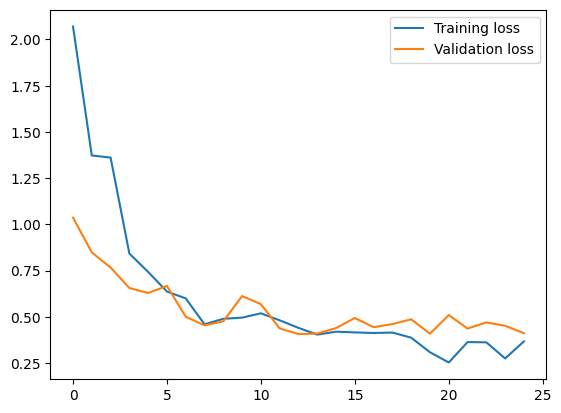

<Figure size 640x480 with 0 Axes>

In [32]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

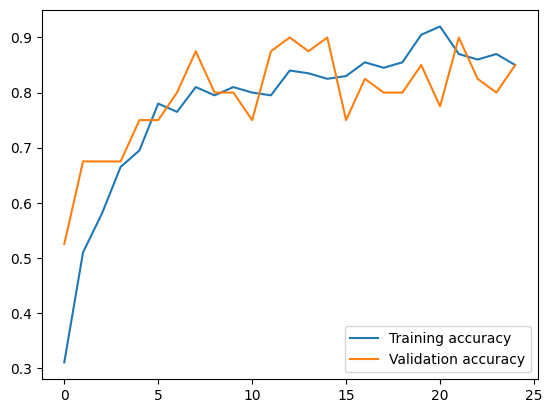

<Figure size 640x480 with 0 Axes>

In [33]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
Y_pred=model.predict(test_set)
y_pred=np.argmax(Y_pred,axis=1)

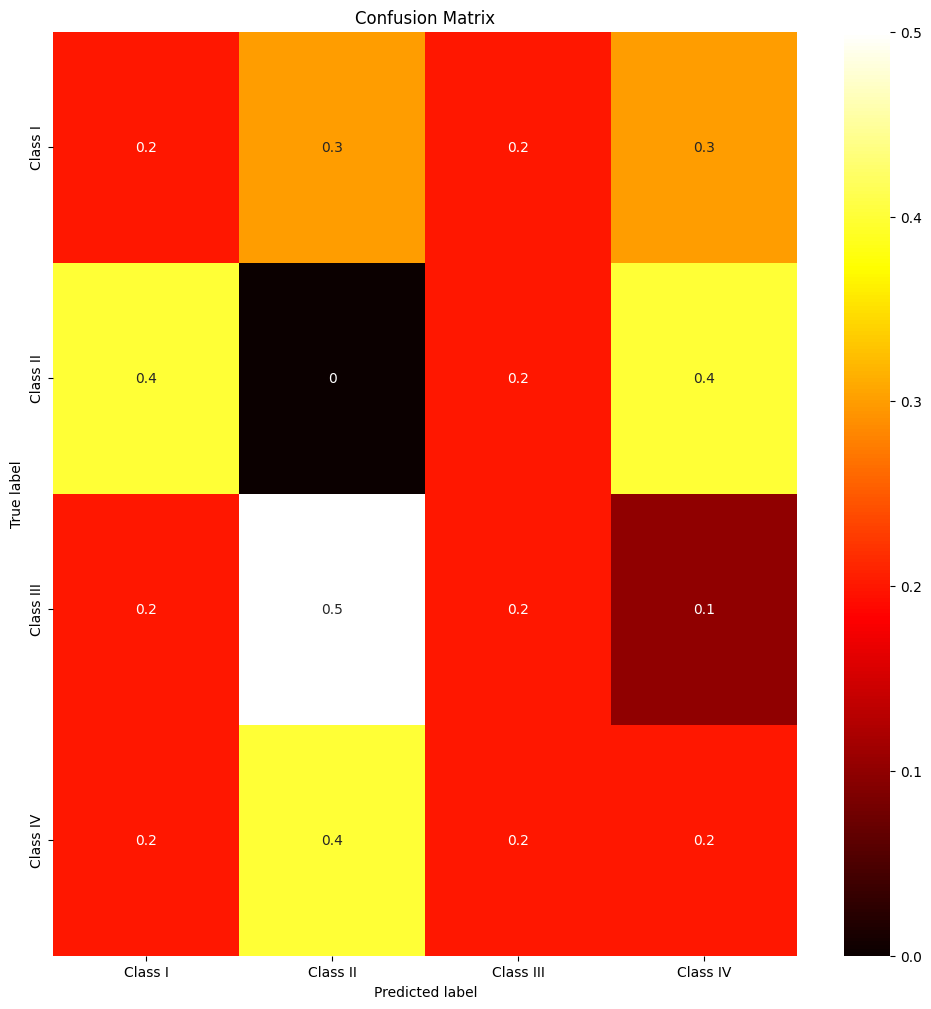

In [35]:
cm=confusion_matrix(test_set.classes,y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
f=plt.figure(figsize=(12,12))
f = sns.heatmap(cm, annot=True,cmap='hot')
f.set_xlabel('Predicted label');f.set_ylabel('True label');
f.set_title('Confusion Matrix');
f.xaxis.set_ticklabels(['Class I','Class II','Class III','Class IV']); f.yaxis.set_ticklabels(['Class I','Class II','Class III','Class IV']);

In [36]:
from keras.models import Model

In [37]:
#Extracting convolution layer1 output
conv_1_output=Model(inputs=model1.inputs,outputs=model1.layers[1].output)
conv_1_output.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_94 (Conv2D)          (None, 63, 63, 32)        864       
                                                                 
Total params: 864
Trainable params: 0
Non-trainable params: 864
_________________________________________________________________


In [38]:
#preprocessing image
def pre_process(img):
  img=img_to_array(img)
  img=img/255.0
  img=np.expand_dims(img,axis=0)
  return img

#Plotting Intermediate Layers output
def plot_intermediate(f_maps):
  s=5
  ix=1
  ax=pyplot.figure(figsize=(8,8))
  for i in range(s):
    for j in range(s):
      ax=pyplot.subplot(s,s,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(f_maps[0,:,:,ix-1],aspect='auto',cmap='hot')
      ix+=1

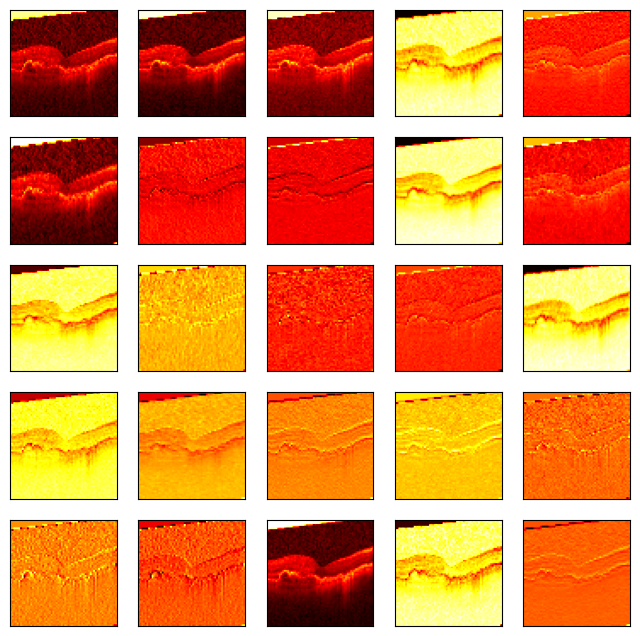

In [41]:
#Plotting CLASS I sample from convolution layer 1
img=load_img("/content/drive/MyDrive/deep learing/Test/CNV/CNV-1131664-1.jpeg",target_size=(128,128))
f_maps=conv_1_output.predict(pre_process(img))
plot_intermediate(f_maps)

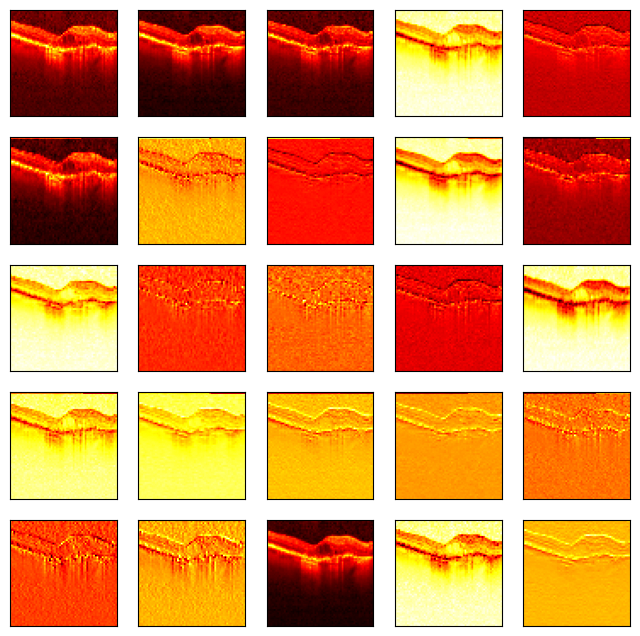

In [42]:
#Plotting CLASS II sample from convolution layer 1
img=load_img("/content/drive/MyDrive/deep learing/Train/CNV/CNV-103044-2.jpeg",target_size=(128,128))
f_maps=conv_1_output.predict(pre_process(img))
plot_intermediate(f_maps)

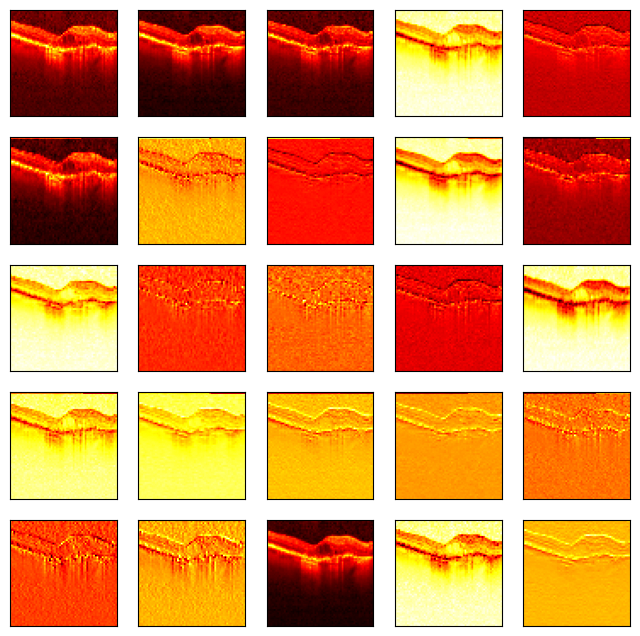

In [43]:
#Plotting CLASS III sample from convolution layer 1
img=load_img("/content/drive/MyDrive/deep learing/Train/CNV/CNV-103044-2.jpeg",target_size=(128,128))
f_maps=conv_1_output.predict(pre_process(img))
plot_intermediate(f_maps)

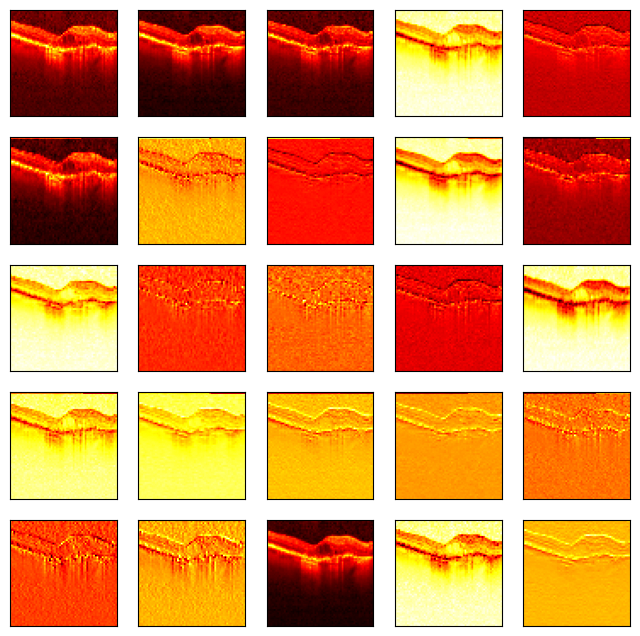

In [44]:
#Plotting CLASS IV sample from convolution layer 1
img=load_img("/content/drive/MyDrive/deep learing/Train/CNV/CNV-103044-2.jpeg",target_size=(128,128))
f_maps=conv_1_output.predict(pre_process(img))
plot_intermediate(f_maps)

In [45]:
#Extracting layer 7 output
conv_2_output=Model(inputs=model1.inputs,outputs=model1.layers[7].output)
conv_2_output.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_94 (Conv2D)          (None, 63, 63, 32)        864       
                                                                 
 batch_normalization_94 (Bat  (None, 63, 63, 32)       96        
 chNormalization)                                                
                                                                 
 activation_94 (Activation)  (None, 63, 63, 32)        0         
                                                                 
 conv2d_95 (Conv2D)          (None, 61, 61, 32)        9216      
                                                                 
 batch_normalization_95 (Bat  (None, 61, 61, 32)       96        
 chNormalization)                                          

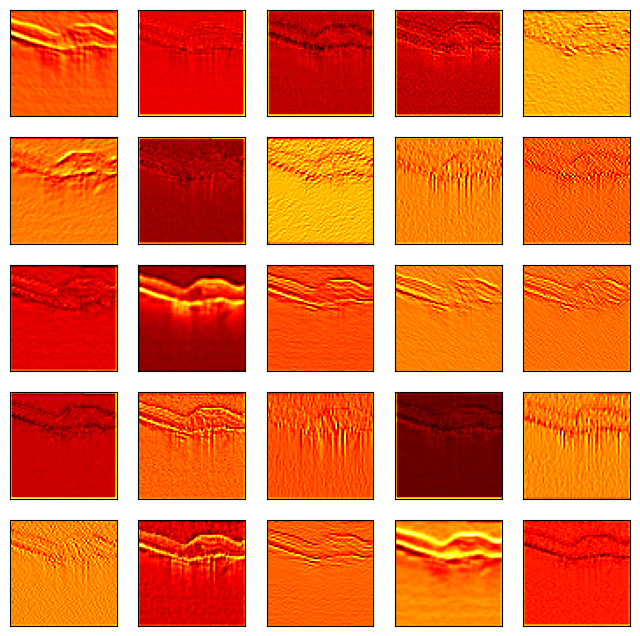

In [47]:
#Plotting CLASS I sample from layer 7
img=load_img("/content/drive/MyDrive/deep learing/Train/CNV/CNV-103044-2.jpeg",target_size=(128,128))
f_maps=conv_2_output.predict(pre_process(img))
plot_intermediate(f_maps)

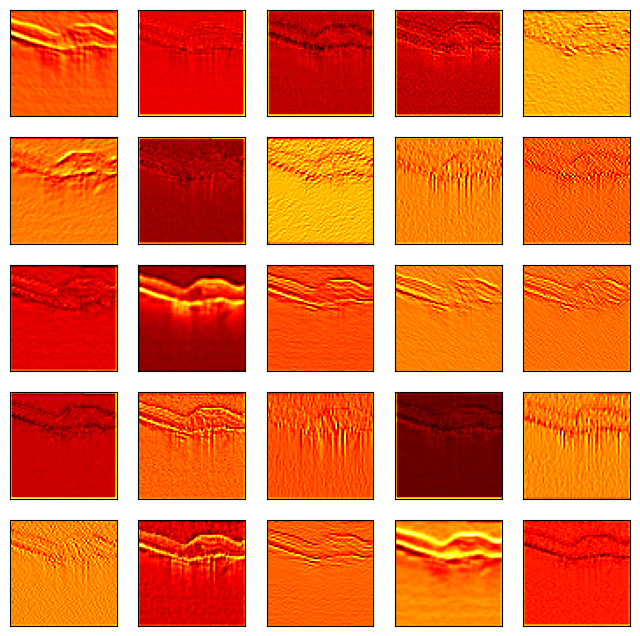

In [48]:
#Plotting CLASS II sample from layer 7
img=load_img("/content/drive/MyDrive/deep learing/Train/CNV/CNV-103044-2.jpeg",target_size=(128,128))
f_maps=conv_2_output.predict(pre_process(img))
plot_intermediate(f_maps)

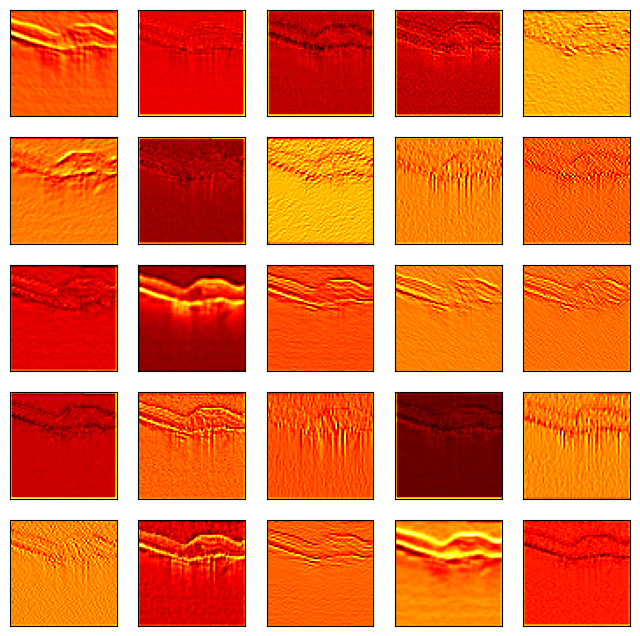

In [49]:
#Plotting CLASS III sample from layer 7
img=load_img("/content/drive/MyDrive/deep learing/Train/CNV/CNV-103044-2.jpeg",target_size=(128,128))
f_maps=conv_2_output.predict(pre_process(img))
plot_intermediate(f_maps)

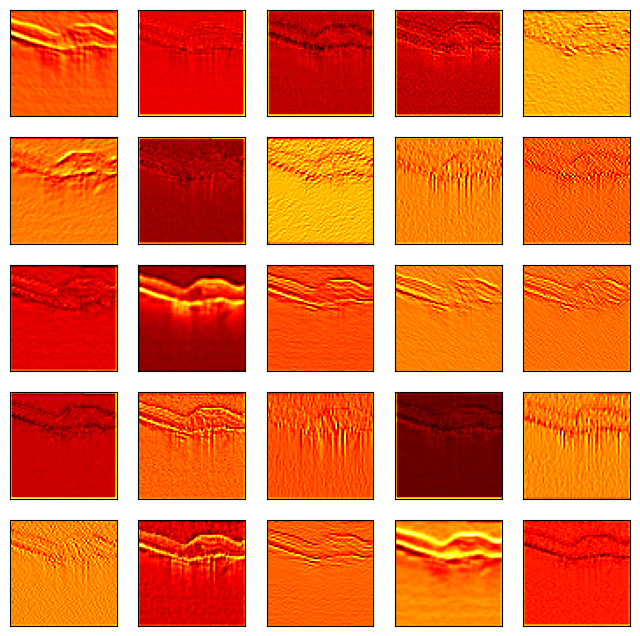

In [50]:
#Plotting CLASS IV sample from layer 7
img=load_img("/content/drive/MyDrive/deep learing/Train/CNV/CNV-103044-2.jpeg",target_size=(128,128))
f_maps=conv_2_output.predict(pre_process(img))
plot_intermediate(f_maps)